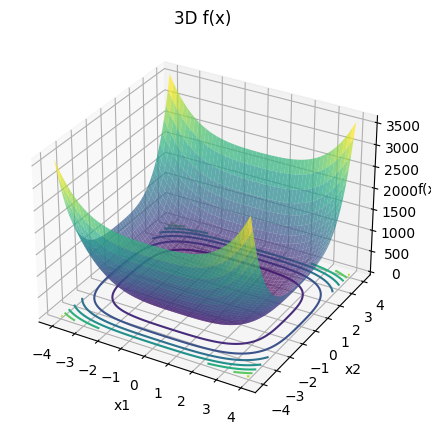

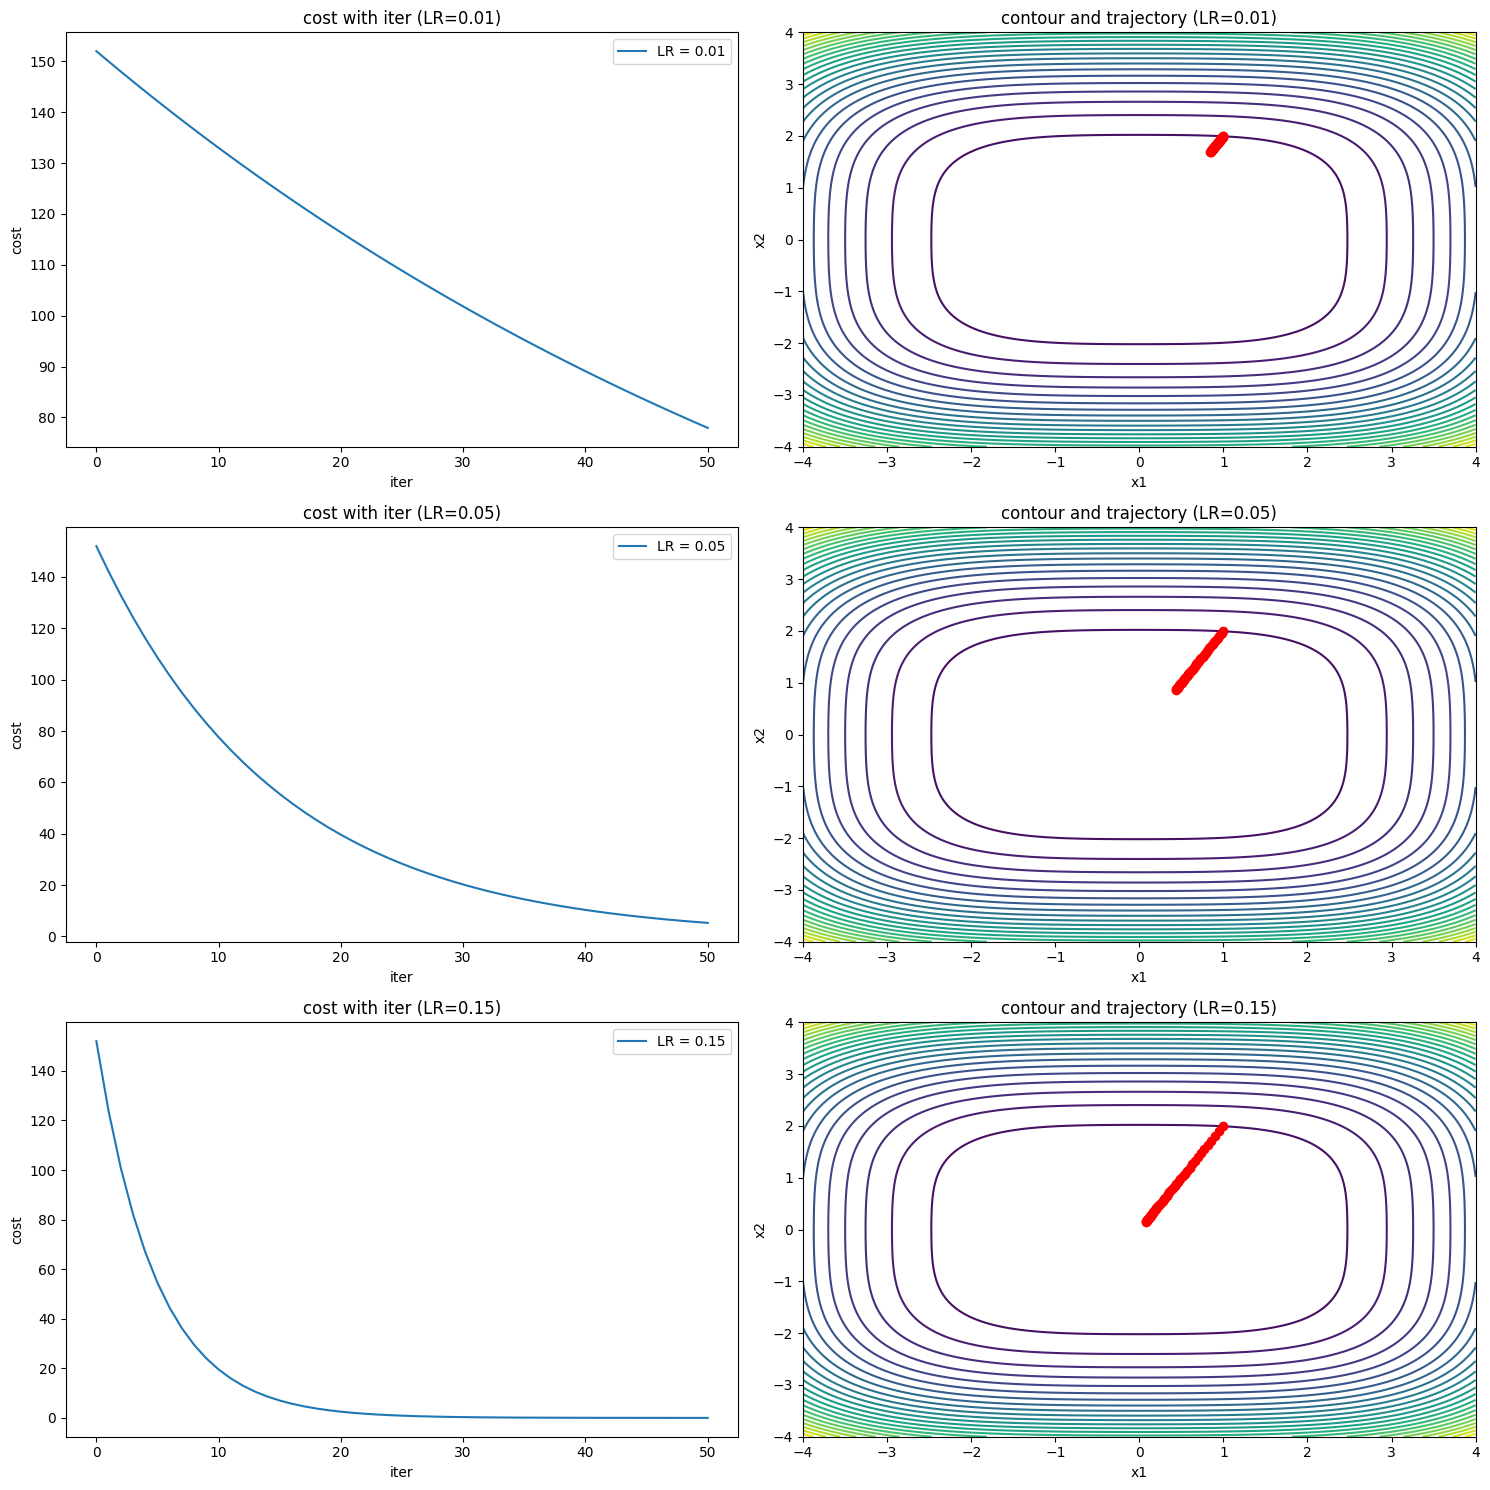

In [20]:
import numpy as np
import matplotlib.pyplot as plt



def f(x):
    x1, x2 = x
    return 4 * x1 ** 4 + 9 * x2 ** 4 + x1 ** 2 * x2 ** 2



def grad_f(x):
    x1, x2 = x
    df_dx1 = 16 * x1 ** 3 + 2 * x1 * x2 ** 2
    df_dx2 = 36 * x2 ** 3 + 2 * x2 * x1 ** 2
    return np.array([df_dx1, df_dx2])



def hessian_f(x):
    x1, x2 = x
    d2f_dx1 = 48 * x1 ** 2 + 2 * x2 ** 2
    d2f_dx2 = 108 * x2 ** 2 + 2 * x1 ** 2
    d2f_dx1dx2 = 4 * x1 * x2
    return np.array([[d2f_dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2]])



def newton(lr_rate, iter, x0):
    x = np.zeros((iter + 1, 2))
    x[0] = x0
    cost_f = np.zeros(iter + 1)
    cost_f[0] = f(x0)

    for k in range(1, iter + 1):
        grad = grad_f(x[k - 1])
        hessian_invers = np.linalg.inv(hessian_f(x[k - 1]))
        x[k] = x[k - 1] - lr_rate * hessian_invers.dot(grad)
        cost_f[k] = f(x[k])

    return x, cost_f



x0 = np.array([1, 2])
iter = 50
lr_rates = [0.01, 0.05, 0.15]


x1_vals = np.linspace(-4, 4, 400)
x2_vals = np.linspace(-4, 4, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])


fig = plt.figure(figsize=(10, 5))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)
ax3d.contour(X1, X2, Z, zdir='z', offset=-6, cmap='viridis')
ax3d.set_xlabel('x1')
ax3d.set_ylabel('x2')
ax3d.set_zlabel('f(x)')
ax3d.set_title("3D f(x)")
plt.show()


fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, lr_rate in enumerate(lr_rates):
   
    x_vals, cost_f = newton(lr_rate, iter, x0)

  
    axs[i, 0].plot(np.arange(iter + 1), cost_f, label=f"LR = {lr_rate}")
    axs[i, 0].set_xlabel("iter")
    axs[i, 0].set_ylabel("cost")
    axs[i, 0].set_title(f"cost with iter (LR={lr_rate})")
    axs[i, 0].legend()


    axs[i, 1].contour(X1, X2, Z, levels=30, cmap='viridis')
    axs[i, 1].plot(x_vals[:, 0], x_vals[:, 1], 'o-', color='red')
    axs[i, 1].set_xlabel("x1")
    axs[i, 1].set_ylabel("x2")
    axs[i, 1].set_title(f"contour and trajectory (LR={lr_rate})")

plt.tight_layout()
plt.show()


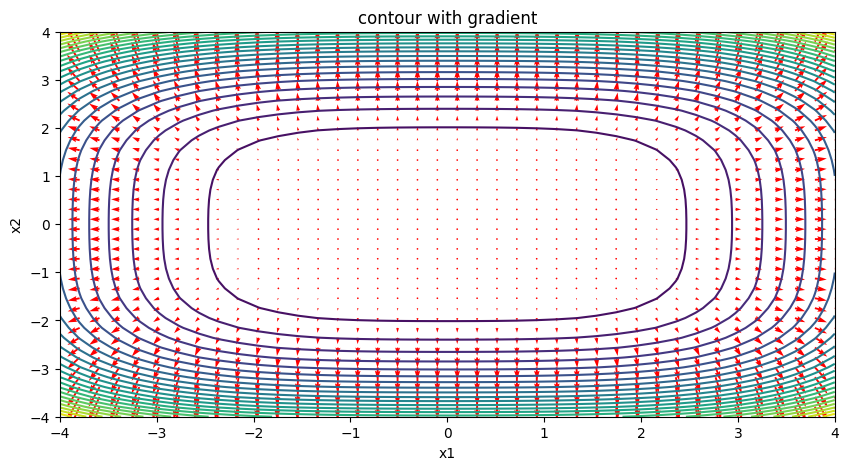

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    x1, x2 = x
    return 4 * x1**4 + 9 * x2**4 + x1**2 * x2**2


def grad_f(x):
    x1, x2 = x
    df_dx1 = 16 * x1**3 + 2 * x1 * x2**2
    df_dx2 = 36 * x2**3 + 2 * x2 * x1**2
    return np.array([df_dx1, df_dx2])


x1_vals = np.linspace(-4, 4, 40)
x2_vals = np.linspace(-4, 4, 40)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])

U = np.zeros_like(X1)
V = np.zeros_like(X2)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        grad = grad_f([X1[i, j], X2[i, j]])
        U[i, j] = grad[0]
        V[i, j] = grad[1]


plt.figure(figsize=(10, 5))
plt.contour(X1, X2, Z, levels=30, cmap='viridis')
plt.quiver(X1, X2, U, V, color='red')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("contour with gradient")
plt.show()
